In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from keras.layers import Activation, Dense



In [3]:

data = pd.read_csv('/content/drive/MyDrive/Wise ML/Wine.csv')
data.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]
data.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [ ]:
data['name'].unique()

array([1, 2, 3])

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='name')
plt.show()
plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
features = data.drop(['name'], axis=1)
target = data['name']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

Logistic Regression

In [ ]:
logreg_model = LogisticRegression(max_iter=800, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 99.130%
Testing Accuracy: 93.548%


**K-Nearest Neighbors**

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

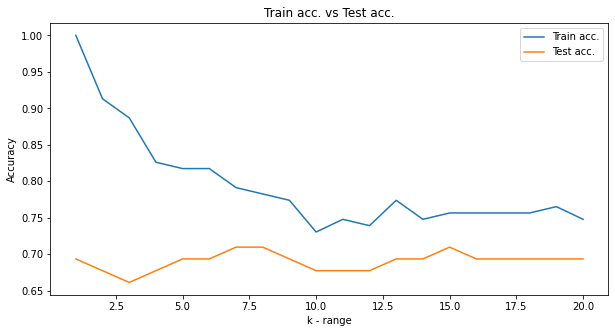

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 81.739%
Testing Accuracy: 69.355%


**DECISION TREES:**

**CART DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 85.484%


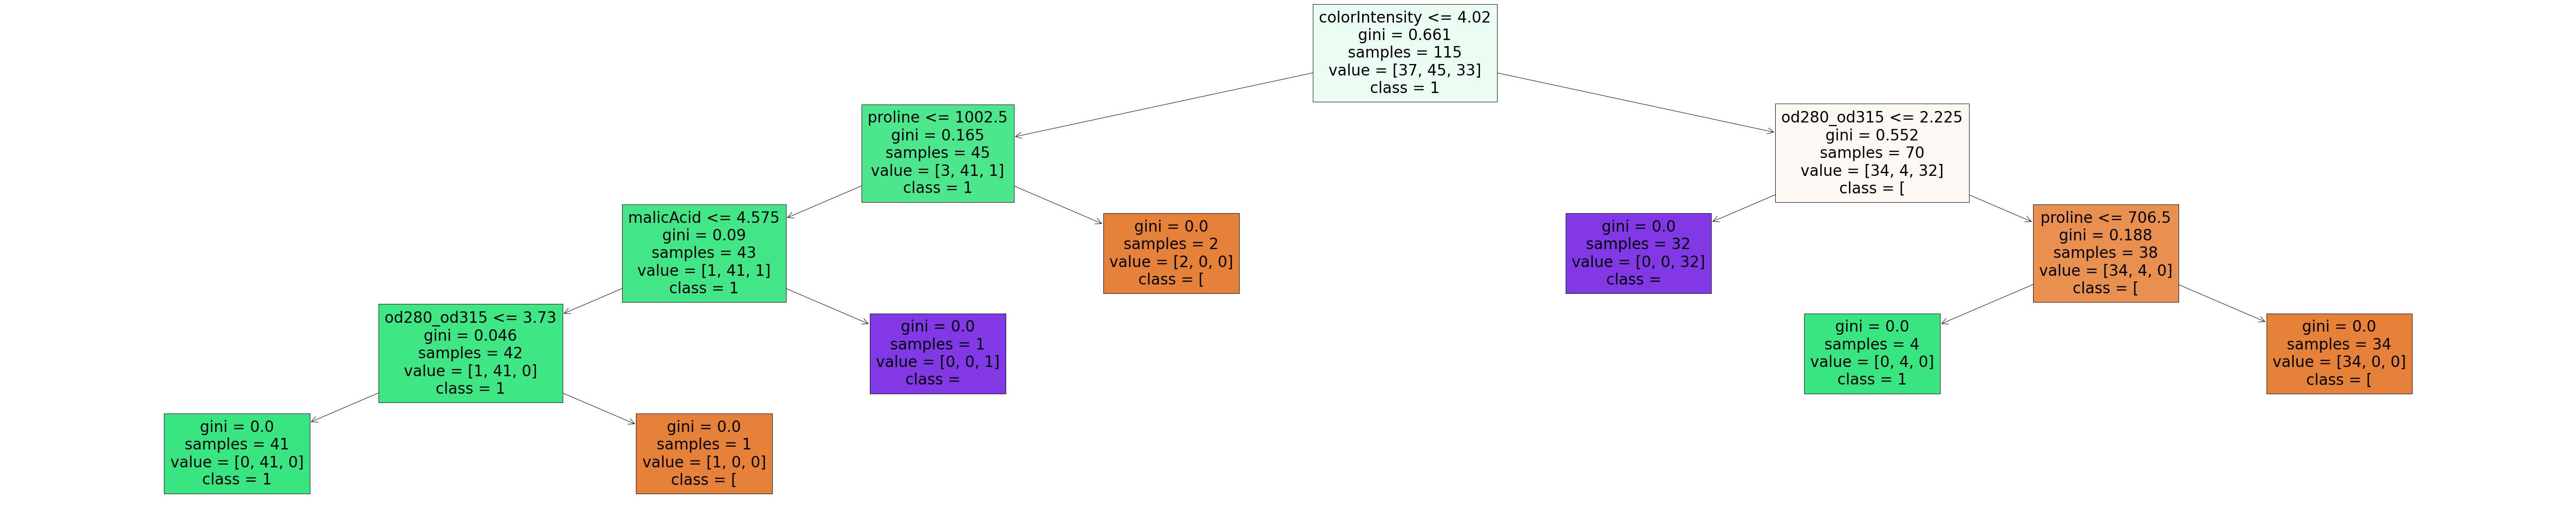

In [ ]:
fig = plt.figure(figsize=(100, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['name'].unique()))
plt.show()

**ID3 DT**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 91.935%


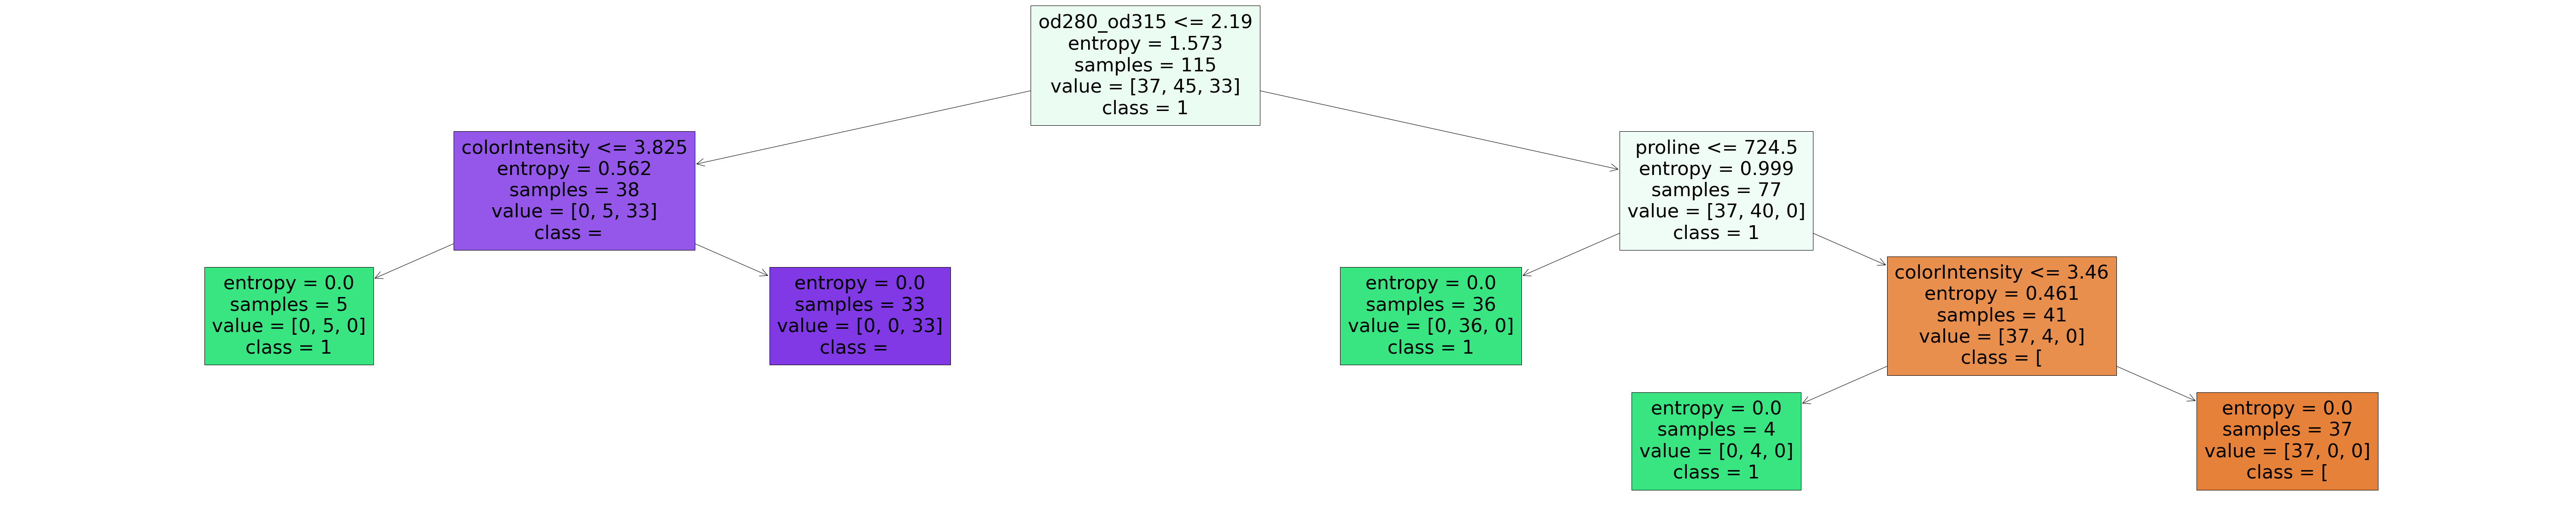

In [ ]:
fig = plt.figure(figsize=(100, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=str(data['name'].unique()))
plt.show()

**SVM**

In [ ]:
data['name'].unique()

array([1, 2, 3])

ValueError: ignored

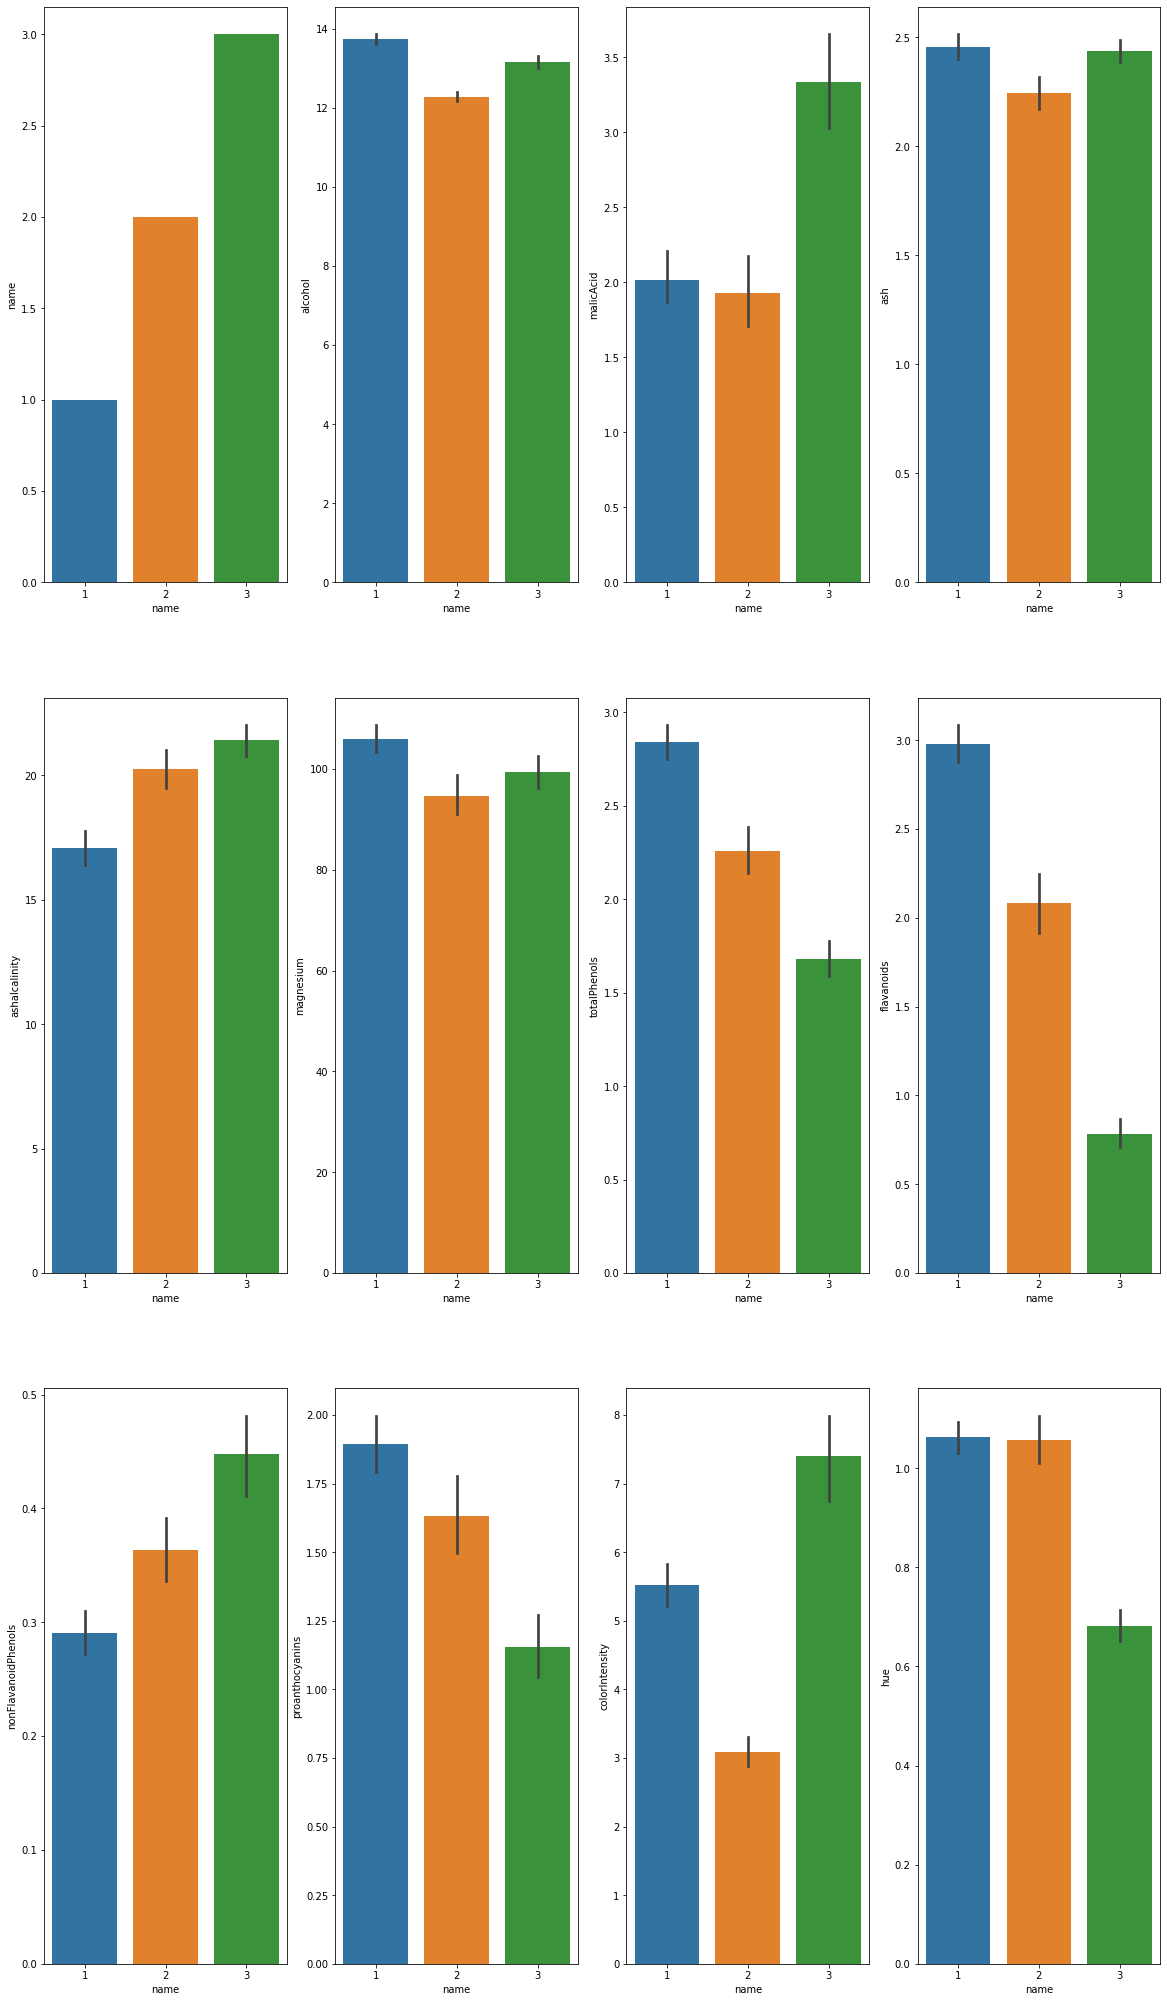

In [ ]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(3, 4, loc+1)
        sns.barplot(x='name', y=col, data=data)
plot_bar(data, data.columns[:-1])
plt.show()

In [ ]:
arr = data.values
arr

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
features = data.drop(['name'], axis=1)
target = data['name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
X_train.shape

(141, 13)

In [ ]:
data.isnull().values.any()

False

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)


[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy score of train SVM
100.0
Accuracy score of test SVM
30.555555555555557


**Performance Metrics:**

In [6]:
arr = data.values
arr

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

**Classification Accuracy:**

In [7]:
X = arr[:, 0:13]
y = arr[:, 13]

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=10000)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [8]:
results.mean()

0.02777777777777778

**Log Loss:**

In [9]:
'''from sklearn.metrics import log_loss

print("Log-Loss)    : " , log_loss(y_test.values, probs))
print("Error Rate   : " , 1- accuracy_score(y_test.values, pred_test))'''
results = cross_val_score(model, X, y, cv=k_fold, scoring='neg_log_loss')

ValueError: ignored

**PCA**

In [ ]:
featurenames = ['name', 'alcohol',	'malicAcid', 'ash', 'ashalcalinity', 'magnesium',	'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins', 'colorIntensity', 'hue', 'od280_od315', 'proline']
# separating features
features = data.loc[:,featurenames]

# separating target
labels = data.loc[:,'name']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = StandardScaler().fit_transform(features)

In [ ]:
print(features)

[[-1.22246766  0.2558245  -0.50162433 ...  0.40709978  1.13169801
   0.97105248]
 [-1.22246766  0.20622873  0.01802001 ...  0.3195674   0.80457911
   1.40099798]
 [-1.22246766  1.70650069 -0.34931478 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 1.36887097  0.34261709  1.73822194 ... -1.60614514 -1.48525319
   0.28632445]
 [ 1.36887097  0.21862767  0.22408586 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.36887097  1.40892609  1.57695301 ... -1.51861275 -1.42836295
  -0.58949046]]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2',])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)

[0.39335457 0.5720246 ]


,pc1,pc2
0,2.551769,0.301013
1,2.803540,-1.064472
2,3.927293,-2.809760
3,1.422861,-0.887657
4,3.293710,-2.172936
...,...,...
172,-3.624646,-2.181813
173,-2.938786,-1.737918
174,-3.034697,-2.738003
175,-2.760688,-2.278545


In [ ]:
print(principal_df)

          pc1       pc2
0    2.551769  0.301013
1    2.803540 -1.064472
2    3.927293 -2.809760
3    1.422861 -0.887657
4    3.293710 -2.172936
..        ...       ...
172 -3.624646 -2.181813
173 -2.938786 -1.737918
174 -3.034697 -2.738003
175 -2.760688 -2.278545
176 -3.497047 -2.737453

[177 rows x 2 columns]


In [ ]:
print(finaldf)

          pc1       pc2  name
0    2.551769  0.301013     1
1    2.803540 -1.064472     1
2    3.927293 -2.809760     1
3    1.422861 -0.887657     1
4    3.293710 -2.172936     1
..        ...       ...   ...
172 -3.624646 -2.181813     3
173 -2.938786 -1.737918     3
174 -3.034697 -2.738003     3
175 -2.760688 -2.278545     3
176 -3.497047 -2.737453     3

[177 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


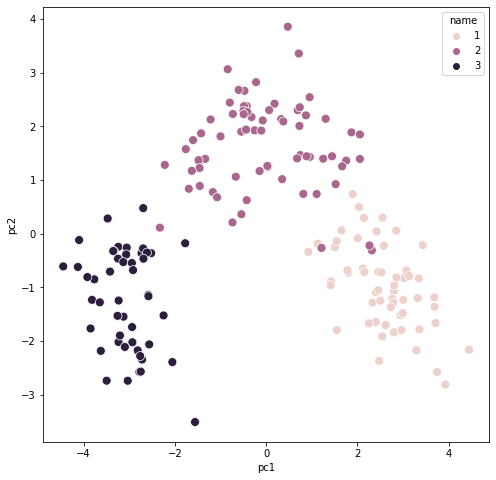

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='name', data=finaldf, s=80)
plt.show()

**Artificial Neural Network:**

In [ ]:
train_df, test_df, train_df['proline'], test_df['proline'] = train_test_split(data.drop(['proline'], axis=1), data['proline'], test_size=0.2, random_state=42, shuffle=True)
train_df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
156,3,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
136,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
98,2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406
158,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
38,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760


In [ ]:
predictors = train_df.columns[:-1]
target = 'proline'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df)
scaled_train

array([[1.        , 0.30409357, 0.45256917, ..., 0.14285714, 0.16849817,
        0.42938659],
       [1.        , 0.32748538, 0.94268775, ..., 0.30769231, 0.15384615,
        0.16904422],
       [0.5       , 0.25730994, 0.48023715, ..., 0.96703297, 0.57142857,
        0.09129815],
       ...,
       [0.        , 0.64912281, 0.21146245, ..., 0.81318681, 0.58974359,
        0.7360913 ],
       [0.5       , 0.25730994, 0.41304348, ..., 0.67032967, 0.74358974,
        0.0085592 ],
       [0.5       , 0.11988304, 0.19367589, ..., 0.43956044, 0.42857143,
        0.09771755]])

In [ ]:
scaled_train_df = pd.DataFrame(scaled_train, columns=train_df.columns.values)
scaled_train_df

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1.0,0.304094,0.452569,0.684492,0.845361,0.293478,0.317241,0.050633,0.943396,0.254355,0.511545,0.142857,0.168498,0.429387
1,1.0,0.327485,0.942688,0.684492,0.742268,0.282609,0.279310,0.054852,0.943396,0.240418,0.289520,0.307692,0.153846,0.169044
2,0.5,0.257310,0.480237,0.454545,0.381443,0.195652,0.644828,0.559072,0.603774,0.836237,0.049734,0.967033,0.571429,0.091298
3,1.0,0.605263,0.183794,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.655052,0.888988,0.032967,0.186813,0.243937
4,0.0,0.821637,0.642292,0.614973,0.134021,0.630435,0.696552,0.569620,0.132075,0.581882,0.298401,0.384615,0.827839,0.343795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.5,0.608187,0.181818,0.470588,0.690722,0.184783,0.310345,0.316456,0.264151,0.216028,0.177620,0.483516,0.553114,0.138374
137,0.5,0.383041,0.199605,0.491979,0.613402,0.152174,0.137931,0.299578,0.660377,0.425087,0.138544,0.373626,0.421245,0.149786
138,0.0,0.649123,0.211462,0.716578,0.340206,0.456522,0.644828,0.542194,0.320755,0.365854,0.493783,0.813187,0.589744,0.736091
139,0.5,0.257310,0.413043,0.459893,0.381443,0.195652,0.506897,0.402954,0.226415,0.550523,0.036412,0.670330,0.743590,0.008559


**Model Building:**

In [ ]:
# Sequential Layer
model = Sequential()

In [ ]:
# Hidden layers
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))

In [ ]:
# Output Layer
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
X = scaled_train_df.drop(target, axis=1).values
y = scaled_train_df[[target]].values

In [ ]:
# Train the model

model.fit(
    x=X,
    y=y,
    epochs=100,
    shuffle=True,
    verbose=2,
)

Epoch 1/100
5/5 - 1s - loss: 0.0366
Epoch 2/100
5/5 - 0s - loss: 0.0234
Epoch 3/100
5/5 - 0s - loss: 0.0203
Epoch 4/100
5/5 - 0s - loss: 0.0148
Epoch 5/100
5/5 - 0s - loss: 0.0138
Epoch 6/100
5/5 - 0s - loss: 0.0128
Epoch 7/100
5/5 - 0s - loss: 0.0113
Epoch 8/100
5/5 - 0s - loss: 0.0108
Epoch 9/100
5/5 - 0s - loss: 0.0105
Epoch 10/100
5/5 - 0s - loss: 0.0101
Epoch 11/100
5/5 - 0s - loss: 0.0093
Epoch 12/100
5/5 - 0s - loss: 0.0099
Epoch 13/100
5/5 - 0s - loss: 0.0093
Epoch 14/100
5/5 - 0s - loss: 0.0093
Epoch 15/100
5/5 - 0s - loss: 0.0086
Epoch 16/100
5/5 - 0s - loss: 0.0083
Epoch 17/100
5/5 - 0s - loss: 0.0084
Epoch 18/100
5/5 - 0s - loss: 0.0081
Epoch 19/100
5/5 - 0s - loss: 0.0079
Epoch 20/100
5/5 - 0s - loss: 0.0081
Epoch 21/100
5/5 - 0s - loss: 0.0087
Epoch 22/100
5/5 - 0s - loss: 0.0083
Epoch 23/100
5/5 - 0s - loss: 0.0078
Epoch 24/100
5/5 - 0s - loss: 0.0077
Epoch 25/100
5/5 - 0s - loss: 0.0076
Epoch 26/100
5/5 - 0s - loss: 0.0073
Epoch 27/100
5/5 - 0s - loss: 0.0068
Epoch 28/1

In [ ]:
def scaler_inverse_transform(value):
    scaled_prediction = value
    scaled_prediction -= added_factor
    return scaled_prediction / multiply_factor

In [ ]:
multiply_factor = scaler.scale_[13]
added_factor = scaler.min_[13]

In [ ]:
scaler_inverse_transform(y[:1][0][0])

880.0000000000001

In [ ]:
prediction = model.predict(X[:])
prediction

array([[0.4383171 ],
       [0.24366933],
       [0.15982054],
       [0.3072681 ],
       [0.41661346],
       [0.30377686],
       [0.20598705],
       [0.3440582 ],
       [0.24055867],
       [0.801582  ],
       [0.2366697 ],
       [0.13082425],
       [0.32649812],
       [0.74817467],
       [0.18685849],
       [0.7360407 ],
       [0.5897356 ],
       [0.32929063],
       [0.22879578],
       [0.0698184 ],
       [0.1852903 ],
       [0.6047137 ],
       [0.10161347],
       [0.50865805],
       [0.12539238],
       [0.29718748],
       [0.39243427],
       [0.35663182],
       [0.7597228 ],
       [0.6924964 ],
       [0.67117465],
       [0.40464205],
       [0.8138218 ],
       [0.7280072 ],
       [0.2629569 ],
       [0.26387596],
       [0.14752686],
       [0.68141925],
       [0.28143552],
       [0.12709154],
       [0.5486855 ],
       [0.27458215],
       [0.10704983],
       [0.31488732],
       [0.6322025 ],
       [0.11048993],
       [0.61254436],
       [0.572

In [ ]:
for idx in range(404):    
    print(f"Actual Price: {scaler_inverse_transform(y[idx][0])* 1000:.2f}$")
    print(f"Predicted Price: {scaler_inverse_transform(prediction[idx][0])* 1000:.2f}$")
    print("-"*30)

Actual Price: 880000.00$
Predicted Price: 892520.56$
------------------------------
Actual Price: 515000.00$
Predicted Price: 619624.40$
------------------------------
Actual Price: 406000.00$
Predicted Price: 502068.40$
------------------------------
Actual Price: 620000.00$
Predicted Price: 708789.89$
------------------------------
Actual Price: 760000.00$
Predicted Price: 862092.07$
------------------------------
Actual Price: 680000.00$
Predicted Price: 703895.16$
------------------------------
Actual Price: 495000.00$
Predicted Price: 566793.85$
------------------------------
Actual Price: 718000.00$
Predicted Price: 760369.58$
------------------------------
Actual Price: 550000.00$
Predicted Price: 615263.25$
------------------------------
Actual Price: 1480000.00$
Predicted Price: 1401817.93$
------------------------------
Actual Price: 562000.00$
Predicted Price: 609810.93$
------------------------------
Actual Price: 380000.00$
Predicted Price: 461415.60$
---------------------

IndexError: ignored